Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive
[[[156 155 153]
  [155 154 152]
  [154 153 151]
  ...
  [162 157 153]
  [162 157 153]
  [162 157 153]]

 [[156 155 153]
  [156 155 153]
  [154 153 151]
  ...
  [162 157 153]
  [162 157 153]
  [162 157 153]]

 [[157 156 154]
  [156 155 153]
  [155 154 152]
  ...
  [162 157 153]
  [162 157 153]
  [162 157 153]]

 ...

 [[110  99  97]
  [111 100  98]
  [112 101  99]
  ...
  [102  97 103]
  [104  99 106]
  [105 100 107]]

 [[109  98  96]
  [110  99  97]
  [111 100  98]
  ...
  [102  97 103]
  [104  99 106]
  [106 101 108]]

 [[108  97  95]
  [109  98  96]
  [110  99  97]
  ...
  [102  97 103]
  [104  99 106]
  [106 101 108]]]


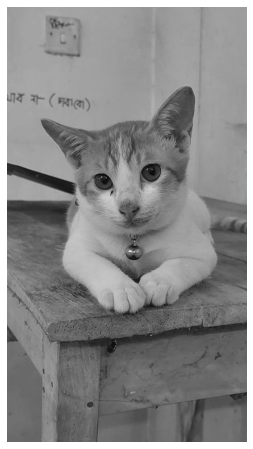

In [20]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/'

A = imread(os.path.join('DATA','Cat.jpg'))
#print(A)
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

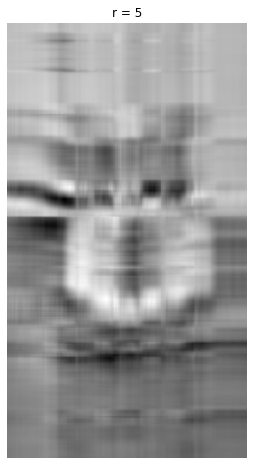

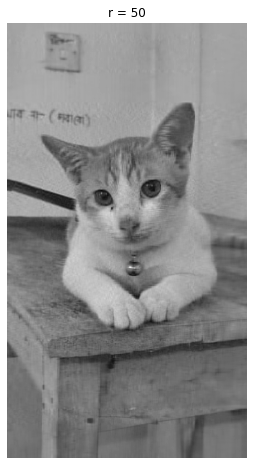

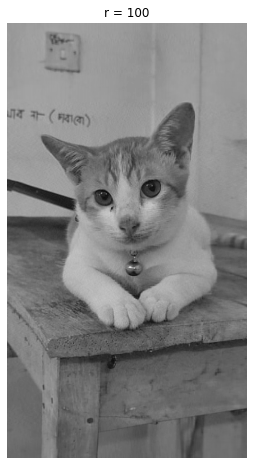

In [21]:
U, S, VT = np.linalg.svd(X,full_matrices=False) #Economy SVD
S = np.diag(S)
# print(S)
j = 0
for r in (5, 50, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

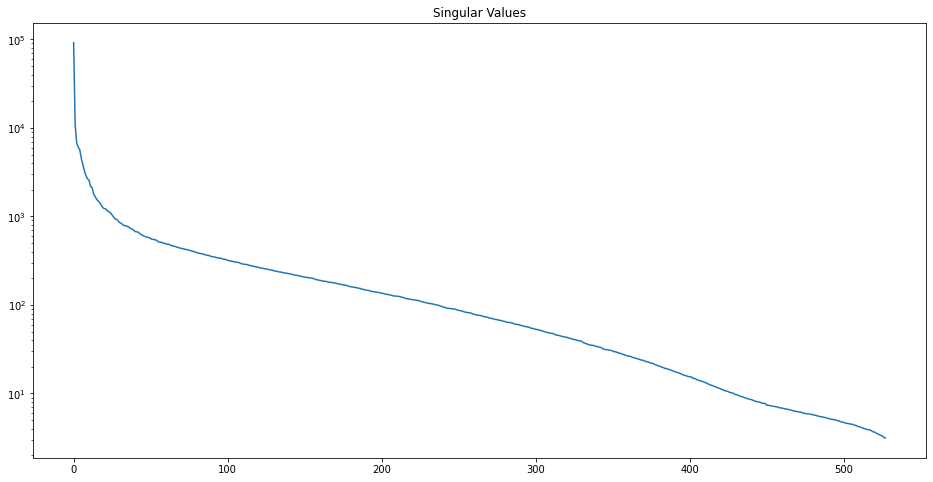

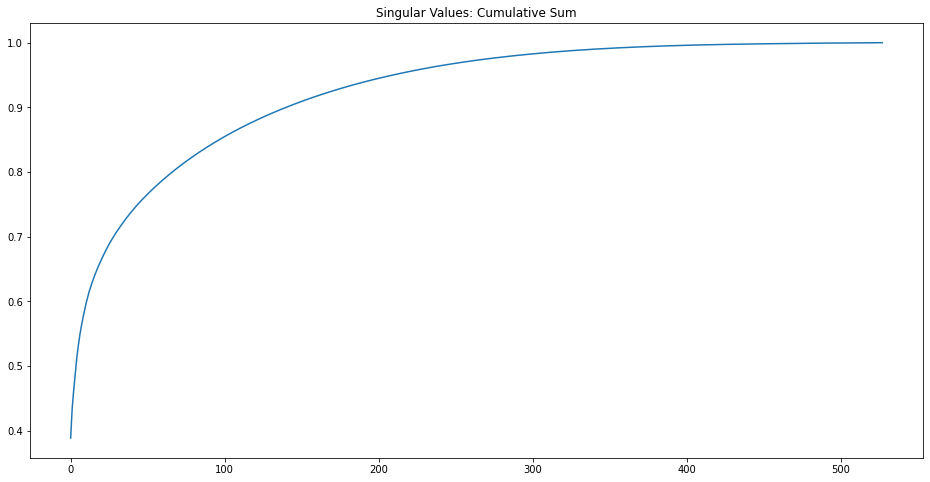

In [22]:
## Singular Value and Cumalitive Sum

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()